1. Data Understanding & Exploration:
A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from numpy import sort
from sklearn.feature_selection import SelectFromModel
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score  
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [2]:
df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')

In [3]:
df1.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes


B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [4]:
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [5]:
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [6]:
churn =  pd.merge(df1, df2, on="customerID", how="outer", indicator='string')

Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python

In [7]:
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,string
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,both
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,both
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,both
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,both
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,both
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,both
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,both
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,both
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,both
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,both


In [8]:
x = df1.isin(churn)
y = df2.isin(churn)
print(x)
print(y)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           True    True           True     True        True    True   
1           True    True           True     True        True    True   
2           True    True           True     True        True    True   
3           True    True           True     True        True    True   
4           True    True           True     True        True    True   
...          ...     ...            ...      ...         ...     ...   
7038        True    True           True     True        True    True   
7039        True    True           True     True        True    True   
7040        True    True           True     True        True    True   
7041        True    True           True     True        True    True   
7042        True    True           True     True        True    True   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  
0             True           True             True            True

2. Data Cleaning & Analysis: 
A. Impute missing/unexpected values in the DataFrame.

In [9]:
churn= churn.replace(r'^\s*$', np.NaN, regex=True)

In [10]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
string               0
dtype: int64

In [11]:
churn1=churn.drop(['customerID','SeniorCitizen','string'],axis=1,inplace=False,errors='ignore')
churn1

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Make sure all the variables with continuous values are of ‘Float’ type.

In [12]:
churn1.dtypes

gender               object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
#impute the missing values to zero
churn1.replace(to_replace=' ', value=0, inplace=True)

churn1

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
#Make sure all the variables with continuous values are of ‘Float’ type.
churn1['TotalCharges'] = churn1['TotalCharges'].astype(float, errors = 'raise')

print(churn1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart.
 

In [15]:
import matplotlib.pyplot as plt 
def piegenerator(churn1,colName):
    plt.pie(churn1[colName].value_counts(), autopct = '%.1f%%',labels=list(churn1[colName].value_counts().index));
    plt.suptitle(colName)
    plt.show()

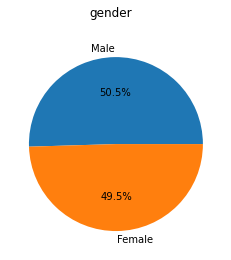

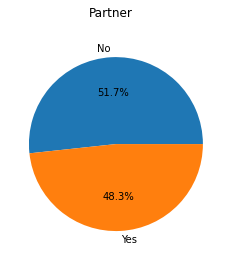

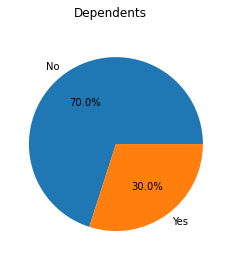

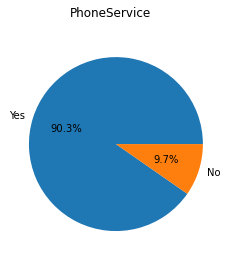

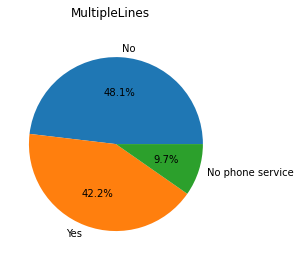

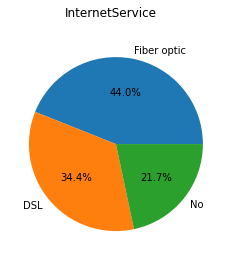

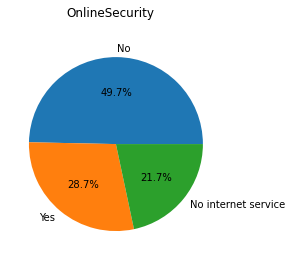

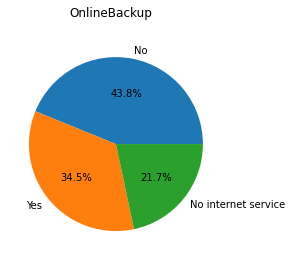

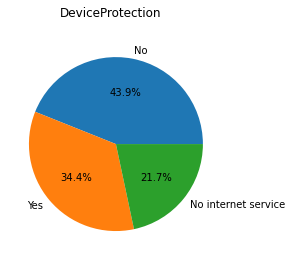

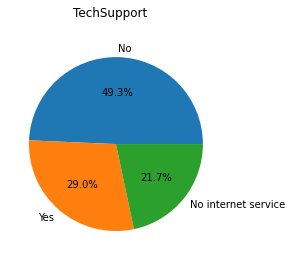

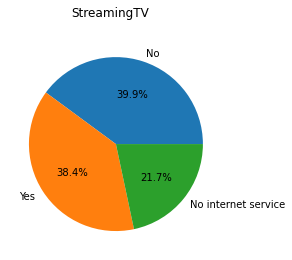

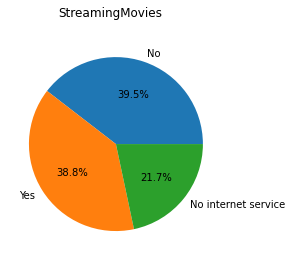

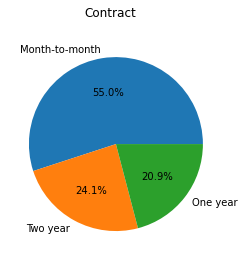

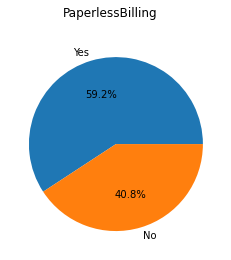

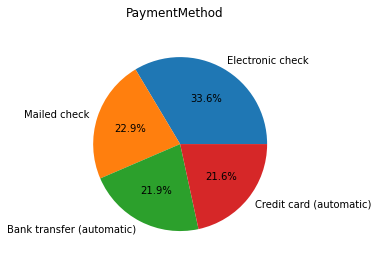

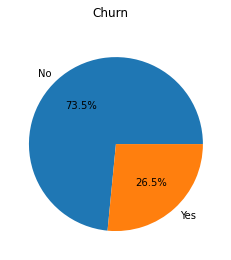

In [16]:

for cl in churn1.columns:
        if churn1[cl].dtype != float and churn1[cl].dtype != int and churn1[cl].dtype != np.float64 and churn1[cl].dtype != np.int64 and len(churn1[cl]) != len(set(churn1[cl])):
            piegenerator(churn1,cl)

From the pie chart generated we can see that gender and partner doesnt play any role in churning as the probability is almost same.Those customers who are dependant have less chance to churn than those independant which is quite intuitive.those who dont have no phone service of course will not churn ,9.7% do not use phone services but may be availing some other telecom services.The feature Multiple lines also plots a balanced piechart for churned and non churned customers.

The services used by most customers are Fiber Optic internet service and we see majority churning happens in that sector than those using DSL and no internet sevices at all. Most of the Customers will opt for  services like Online Security Online Backup Device Protection TechSupport Streming TV streming Movies. So the most customers who churn belonging to those availing these services may be looking out for more options.Online backup and device protection have same distribution.So we drop one of them.Some dont use internet services at all and have less chance to churn. .Streaming Movies and Streaming TV also have same distribution.So we drop one of them before encoding.
Customers in a month-to-month contract, with PaperlessBilling and are within 12 months tenure, are more likely to churn; On the other hand, customers with one or two year contract, with longer than 12 months tenure, that are not using PaperlessBilling, are less likely to churn.Gender Does'nt Play an important Role in Predicting Our Target Variable.

Most of the People that Were Partner will Stay Longer with The Company. Here We can See Tenure and Total Charges as well as Monthly charges and Total Charges are correlated with each other.Senior Citizens have almost double the churn rate than younger population.

In [17]:
#Remove customer IDs from the data set
df2 = churn1.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [18]:

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = df_dummies.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(df_dummies)
df_final = pd.DataFrame(scaler.transform(df_dummies))
df_final.columns = features
df_final

,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0.001275,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.472222,0.385075,0.215867,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.027778,0.354229,0.010310,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.625000,0.239303,0.210241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.027778,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.662189,0.227521,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,1.000000,0.845274,0.847461,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0.152778,0.112935,0.037809,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,0.055556,0.558706,0.033210,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [19]:
#Find correlation to figure out which customer feature need to include in churn model
corr_churn=df_final.corr()
corr_churn

,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.247900,0.825880,-0.352229,-0.379697,0.379697,-0.159712,0.159712,-0.008448,0.008448,...,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.247900,1.000000,0.651065,0.193356,-0.096848,0.096848,0.113890,-0.113890,-0.247398,0.247398,...,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.825880,0.651065,1.000000,-0.199484,-0.319072,0.319072,-0.064653,0.064653,-0.113008,0.113008,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,-0.352229,0.193356,-0.199484,1.000000,0.150448,-0.150448,0.164221,-0.164221,-0.011942,0.011942,...,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
Partner_No,-0.379697,-0.096848,-0.319072,0.150448,1.000000,-1.000000,0.452676,-0.452676,0.017706,-0.017706,...,-0.117412,0.280865,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125
Partner_Yes,0.379697,0.096848,0.319072,-0.150448,-1.000000,1.000000,-0.452676,0.452676,-0.017706,0.017706,...,0.117412,-0.280865,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125
Dependents_No,-0.159712,0.113890,-0.064653,0.164221,0.452676,-0.452676,1.000000,-1.000000,-0.001762,0.001762,...,0.039741,0.231720,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071
Dependents_Yes,0.159712,-0.113890,0.064653,-0.164221,-0.452676,0.452676,-1.000000,1.000000,0.001762,-0.001762,...,-0.039741,-0.231720,0.068368,0.204613,0.111377,-0.111377,0.052021,0.060267,-0.150642,0.059071
PhoneService_No,-0.008448,-0.247398,-0.113008,-0.011942,0.017706,-0.017706,-0.001762,0.001762,1.000000,-1.000000,...,0.032959,0.000742,0.002791,-0.003519,0.016505,-0.016505,-0.007556,0.007721,-0.003062,0.003319
PhoneService_Yes,0.008448,0.247398,0.113008,0.011942,-0.017706,0.017706,0.001762,-0.001762,-1.000000,1.000000,...,-0.032959,-0.000742,-0.002791,0.003519,-0.016505,0.016505,0.007556,-0.007721,0.003062,-0.003319


Some variables have a positive relation to our predicted variable and some have a negative relation. A positive value has a positive impact on our predicted variable Churn. Factors which have negative relation such as InternetService_Fiber optic,Contract_Month-to-month,SeniorCitizen,PaperlessBilling_Yes,tenure_group,PaperlessBilling plays a role in customer churn

<AxesSubplot:>

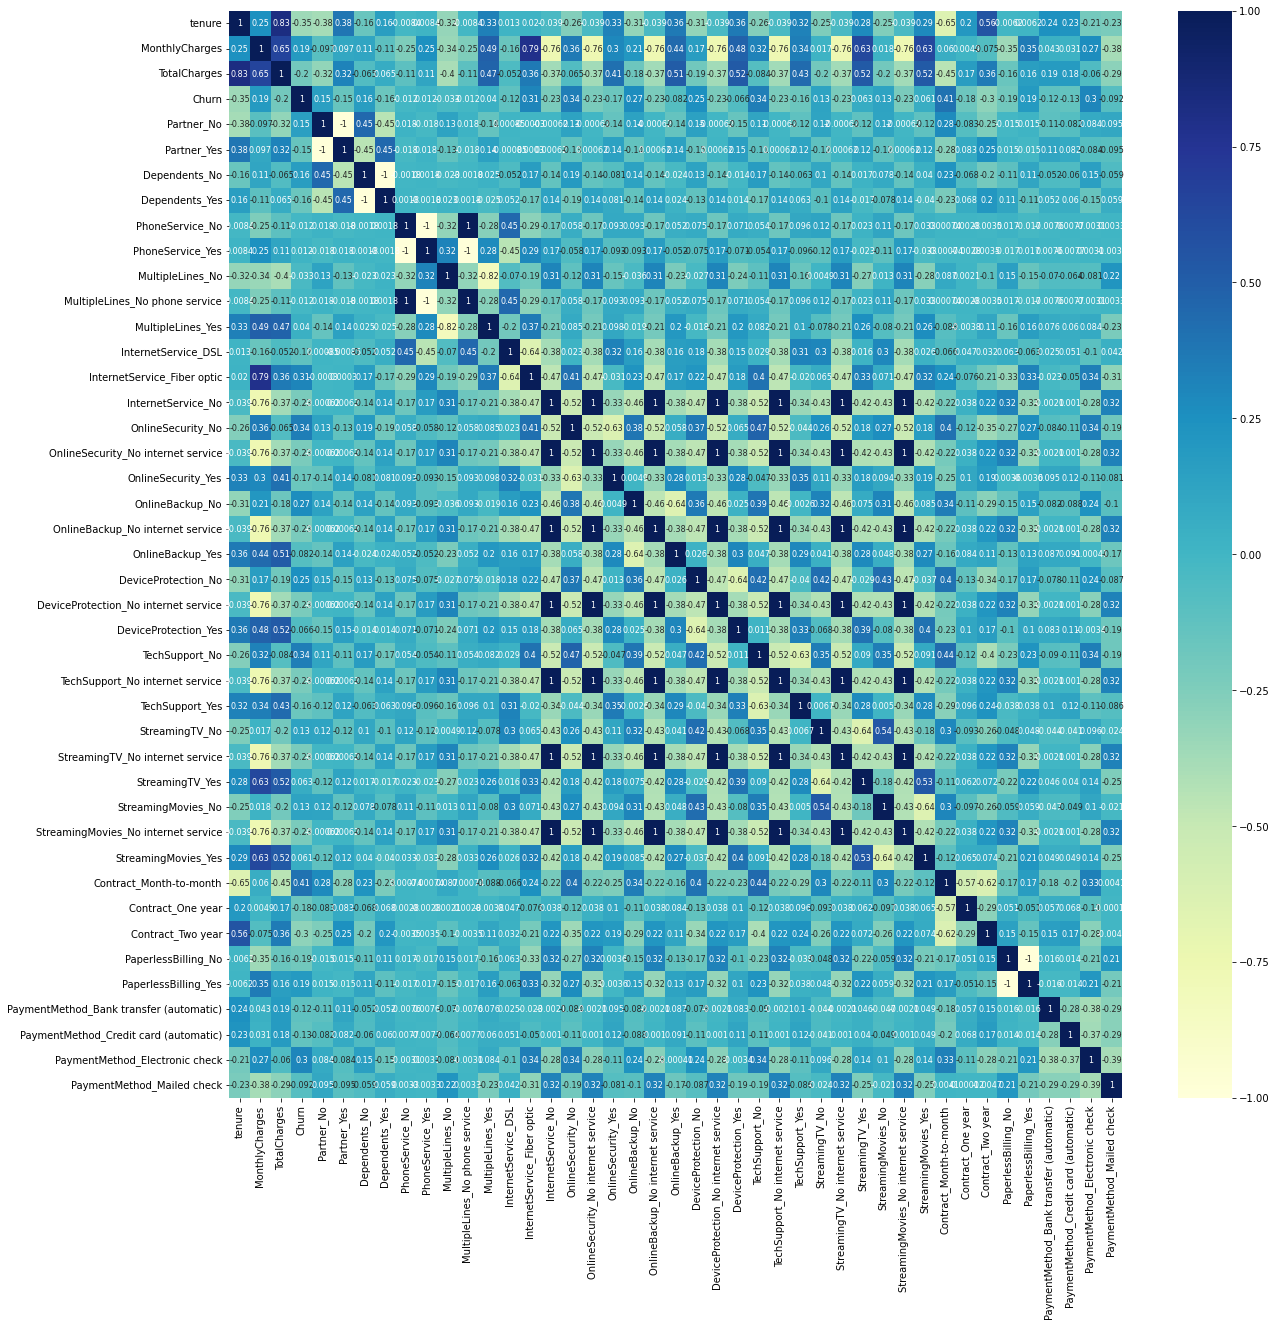

In [20]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corr_churn,annot=True,cmap="YlGnBu",annot_kws={"size":8},ax=ax)  

Total charges and monthly charges are highly correlated. 
Highly Correlated variables-tenure-TotalCharges,InternetService-MonthlyCharges,Contract-Tenure,MonthlyCharges-TotalCharges,MonthlyCharges-StreamingTV,StreamingMovies,MonthlyCharges-InternetService.So we can drop TotalCharges.
No trend between Churn Rate and Monthly/Total Charges. High tenure means low churn

Split the data into 80% train and 20% test.

In [21]:
df_final=df_final.drop(['TotalCharges'],axis=1,errors = 'ignore')   



In [22]:
y = df_final['Churn'].values
X = df_final.drop(columns = ['Churn'])


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


3. Model building and Improvement
A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.
B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance

In [24]:
# fit model on training data
model = XGBClassifier(objective= 'binary:logistic')
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [25]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [26]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.78%


In [27]:
Test_Accuracy = model.score(X_test,y_test)
Test_Accuracy

0.7877927608232789

In [28]:
Train_Accuracy=model.score(X_train,y_train)
Train_Accuracy

0.9254526091586794

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))
print(metrics.confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1036
         1.0       0.62      0.52      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

[[916 120]
 [179 194]]


916 consumers were predicted correctly not to churn and 194 to churn. 
120 customers were falsely classified as not to churn but actually churned and 179 were falsely classified to churn but did not.This is an overfit model.


In [30]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [31]:
#hyperparameter optimization
parameters = {
    "learning_rate" :[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth"     :[3,4,5,6,7,8,9,10],
    "min_child_weight":[1,3,5,7],
    "gamma"           :[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
             }

In [32]:
random_search = RandomizedSearchCV(model,param_distributions = parameters,n_iter =5,scoring = 'roc_auc', n_jobs =-1,cv =5,verbose =3)

In [33]:
random_search.fit(X,y)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=

In [34]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [35]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [36]:
classifier = xgboost.XGBClassifier(min_child_weight= 3,max_depth=5,gamma= 0.2,eta= 0.05,colsample_bytree= 0.4)

In [37]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False, eta=0.05,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0500000007, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [38]:
#test accuracy
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv=10)
score

array([0.80283688, 0.80567376, 0.79432624, 0.81676136, 0.78267045,
       0.78267045, 0.80823864, 0.79261364, 0.78693182, 0.81392045])

In [39]:
score.mean()*100

79.86643697614441

In [40]:
Train_Accuracy_opt=classifier.score(X_train,y_train)
(Train_Accuracy_opt)*100

81.94888178913739

In [41]:
y_pred_opt = classifier.predict(X_test)
predictions_opt = [round(value) for value in y_pred_opt]

In [42]:
print(metrics.classification_report(y_test, predictions_opt))
print(metrics.confusion_matrix(y_test, predictions_opt))


              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1036
         1.0       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

[[945  91]
 [178 195]]


After optimization we could only slightly improve the accuracy but train accuracy is reduced thus solving the problem of overfit.

In [43]:
eval_set = [(X_test, y_test)]
classifier.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.26047
[1]	validation_0-error:0.20653
[2]	validation_0-error:0.19304
[3]	validation_0-error:0.19304
[4]	validation_0-error:0.19304
[5]	validation_0-error:0.19304
[6]	validation_0-error:0.19163
[7]	validation_0-error:0.19659
[8]	validation_0-error:0.19233
[9]	validation_0-error:0.19304
[10]	validation_0-error:0.19730
[11]	validation_0-error:0.19446
[12]	validation_0-error:0.19446
[13]	validation_0-error:0.19375
[14]	validation_0-error:0.19092
[15]	validation_0-error:0.18879
[16]	validation_0-error:0.18737
[17]	validation_0-error:0.18879
[18]	validation_0-error:0.19021
[19]	validation_0-error:0.18950
[20]	validation_0-error:0.18737
[21]	validation_0-error:0.18737
[22]	validation_0-error:0.18666
[23]	validation_0-error:0.18879
[24]	validation_0-error:0.18879
[25]	validation_0-error:0.19092
[26]	validation_0-error:0.19233
[27]	validation_0-error:0.19304
[28]	validation_0-error:0.19233
[29]	validation_0-error:0.19163
[30]	validation_0-error:0.18808
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False, eta=0.05,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.0500000007, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [44]:
eval_set = [(X_test, y_test)]
classifier = classifier.fit(X_train, y_train, early_stopping_rounds=7, eval_metric="error", eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.26047
[1]	validation_0-error:0.20653
[2]	validation_0-error:0.19304
[3]	validation_0-error:0.19304
[4]	validation_0-error:0.19304
[5]	validation_0-error:0.19304
[6]	validation_0-error:0.19163
[7]	validation_0-error:0.19659
[8]	validation_0-error:0.19233
[9]	validation_0-error:0.19304
[10]	validation_0-error:0.19730
[11]	validation_0-error:0.19446
[12]	validation_0-error:0.19446
[13]	validation_0-error:0.19375


In [45]:
preds_train = classifier.predict(X_train)
preds_test = classifier.predict(X_test)

In [46]:
print('XGBoosting:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=preds_train),
    accuracy_score(y_true=y_test, y_pred=preds_test)
))

XGBoosting:
> Accuracy on training data = 0.8037
> Accuracy on validation data = 0.8084


In [47]:
print(classifier.feature_importances_)
print()
print('Length of feature_importances_ list: ' + str(len(classifier.feature_importances_)))
print()
print('Number of predictors in trainX: ' + str(X_train.shape[1]))

[0.02379139 0.0060979  0.00577018 0.         0.00601896 0.00416755
 0.00400259 0.00531777 0.00532298 0.00379032 0.00414599 0.0125334
 0.05862763 0.0079072  0.13797453 0.1148886  0.03153737 0.00623481
 0.         0.00794372 0.00596863 0.         0.00509413 0.03044377
 0.         0.01782787 0.00154436 0.         0.00306086 0.00274838
 0.00984175 0.00248713 0.36952966 0.012516   0.06255074 0.0065235
 0.00359616 0.00070488 0.00367102 0.01343468 0.00238355]

Length of feature_importances_ list: 41

Number of predictors in trainX: 41


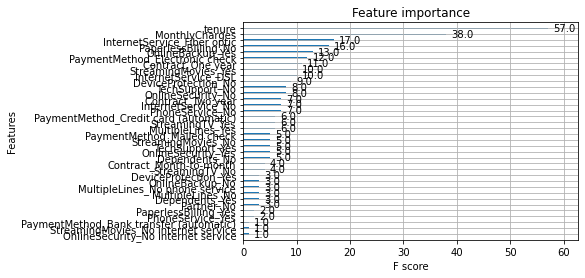

In [48]:
# plot feature importance
plot_importance(classifier)
plt.show()

In [49]:
feature_names = X_train.columns

feature_importance_df = pd.DataFrame(classifier.feature_importances_, feature_names)
feature_importance_df = feature_importance_df.reset_index()
feature_importance_df.columns = ['Feature', 'Importance']
feature_importance_df

,Feature,Importance
0,tenure,0.023791
1,MonthlyCharges,0.006098
2,Partner_No,0.005770
3,Partner_Yes,0.000000
4,Dependents_No,0.006019
5,Dependents_Yes,0.004168
6,PhoneService_No,0.004003
7,PhoneService_Yes,0.005318
8,MultipleLines_No,0.005323
9,MultipleLines_No phone service,0.003790


In [50]:
feature_importance_df_top_10 = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
feature_importance_df_top_10

,Feature,Importance
32,Contract_Month-to-month,0.369530
14,OnlineSecurity_No,0.137975
15,OnlineSecurity_No internet service,0.114889
34,Contract_Two year,0.062551
12,InternetService_Fiber optic,0.058628
16,OnlineSecurity_Yes,0.031537
23,TechSupport_No,0.030444
0,tenure,0.023791
25,TechSupport_Yes,0.017828
39,PaymentMethod_Electronic check,0.013435


<BarContainer object of 10 artists>

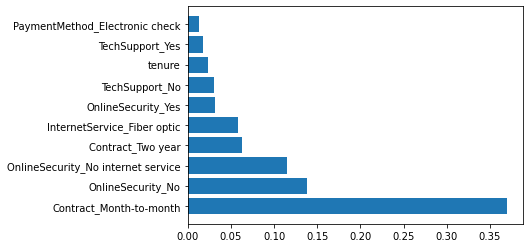

In [51]:
plt.barh(feature_importance_df_top_10.Feature, feature_importance_df_top_10.Importance)


Length of remaining predictors after XGB: 36


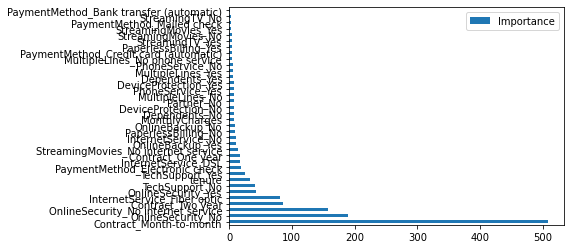

In [52]:
features_selected_from_XGBoost = classifier.get_booster().get_score(importance_type='gain')
keys = list(features_selected_from_XGBoost.keys())
values = list(features_selected_from_XGBoost.values())

features_selected_from_XGBoost = pd.DataFrame(data=values, 
                                              index=keys, 
                                              columns=["Importance"]).sort_values(by = "Importance", 
                                                                             ascending=False)
features_selected_from_XGBoost.plot(kind='barh')

print()
print('Length of remaining predictors after XGB: ' + str(len(features_selected_from_XGBoost)))

In [53]:
print(feature_importance_df[(feature_importance_df["Importance"] == 0)])
print()
print('Length of features with Importance = zero:  ' + str(feature_importance_df[(feature_importance_df["Importance"] == 0)].shape[0] ))

                                 Feature  Importance
3                            Partner_Yes         0.0
18      OnlineBackup_No internet service         0.0
21  DeviceProtection_No internet service         0.0
24       TechSupport_No internet service         0.0
27       StreamingTV_No internet service         0.0

Length of features with Importance = zero:  5


In [54]:
top_10_of_retained_features_from_model = features_selected_from_XGBoost.sort_values(by='Importance', ascending=False).head(10)
top_10_of_retained_features_from_model

,Importance
Contract_Month-to-month,508.416931
OnlineSecurity_No,189.832092
OnlineSecurity_No internet service,158.069336
Contract_Two year,86.060356
InternetService_Fiber optic,80.662750
OnlineSecurity_Yes,43.390644
TechSupport_No,41.886017
tenure,32.733349
TechSupport_Yes,24.528448
PaymentMethod_Electronic check,18.484085


<BarContainer object of 10 artists>

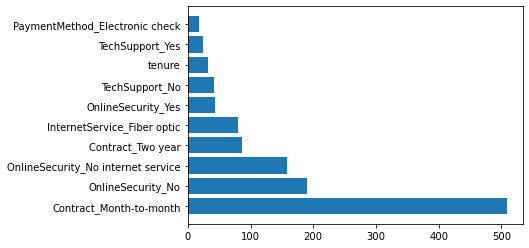

In [55]:
plt.barh(top_10_of_retained_features_from_model.index, top_10_of_retained_features_from_model.Importance)

In [56]:
#Grid Search
xgb_grid = XGBClassifier(objective= 'binary:logistic')

In [57]:
parameters = {
    'max_depth': range (2, 10, 1),
    'colsample_bytree': [0.6, 0.8, 1.0],     
    'gamma': [0.5, 1, 1.5,0.2],   
    'n_estimators': range(60, 200, 40),
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2]}

In [58]:
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : "rmse", 
            "eval_set" : [[X_test, y_test]]}

In [59]:
cv = 5

grid_search = GridSearchCV(
    estimator=xgb_grid,
    param_grid=parameters,
    scoring = 'neg_log_loss',
    n_jobs = -1,
    cv = TimeSeriesSplit(n_splits=cv).get_n_splits([X_train, y_train]),
    verbose=1)

xgb_grid_model = grid_search.fit(X_train, y_train, **fit_params)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
[0]	validation_0-rmse:0.48158
[1]	validation_0-rmse:0.46589
[2]	validation_0-rmse:0.45166
[3]	validation_0-rmse:0.44035
[4]	validation_0-rmse:0.43022
[5]	validation_0-rmse:0.42121
[6]	validation_0-rmse:0.41383
[7]	validation_0-rmse:0.40758
[8]	validation_0-rmse:0.40291
[9]	validation_0-rmse:0.39821
[10]	validation_0-rmse:0.39443
[11]	validation_0-rmse:0.39095
[12]	validation_0-rmse:0.38821
[13]	validation_0-rmse:0.38475
[14]	validation_0-rmse:0.38248
[15]	validation_0-rmse:0.38068
[16]	validation_0-rmse:0.37849
[17]	validation_0-rmse:0.37692
[18]	validation_0-rmse:0.37562
[19]	validation_0-rmse:0.37451
[20]	validation_0-rmse:0.37352
[21]	validation_0-rmse:0.37247
[22]	validation_0-rmse:0.37149
[23]	validation_0-rmse:0.37070
[24]	validation_0-rmse:0.36955
[25]	validation_0-rmse:0.36896
[26]	validation_0-rmse:0.36788
[27]	validation_0-rmse:0.36722
[28]	validation_0-rmse:0.36679
[29]	validation_0-rmse:0.36617
[30]	validation

In [60]:
print('Best Parameter:')
print(xgb_grid_model.best_params_) 
print()
print()
print(xgb_grid_model.best_estimator_)

Best Parameter:
{'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140}


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=140,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [78]:
preds_train = xgb_grid_model.predict(X_train)
preds_test = xgb_grid_model.predict(X_test)

print('XGBoosting with GridSearch:\n> Accuracy on training data = {:.4f}\n> Accuracy on validation data = {:.4f}'.format(
    accuracy_score(y_true=y_train, y_pred=preds_train),
    accuracy_score(y_true=y_test, y_pred=preds_test)))


XGBoosting with GridSearch:
> Accuracy on training data = 0.8076
> Accuracy on validation data = 0.8119
